<a href="https://colab.research.google.com/github/nisaac21/TensorFlow/blob/main/Basic_Hidden_Markov_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**What is it?**

* Unlike previous models, we aren't feeding the model data, we are giving it probability distributions. 
* E.g. we are trying to predict tomorrow's weather given today's weather. We know that if today is sunny, there is a 80% chance for tomrrow and 20% chance of rain tomorrow. Etc. 
* Sometimes, we use a huge data set to find the porbability distributions
* *Definition*: The Hidden Markov Model is a finite set of states, each of which is associated with a (generally multidimensional) probability distribution. Transitions among the states are governed by a set of probabilities called transition probabilities. 
* It's called hiden because we never actually look at the states, we make observations about the state. E.g. If it's sunny, 80% chance I am happy, 20% chance I am sad. We can observe something that is happening at that state.
* *Goal*: Predicting future states based on past states and probabilities. 

##Data

* In previous examples we were using 100's to 1000's of data. Here, all we need is probability distributions
* **States**: In each markov model we have a finite set of states; in this case weather (sunny rainy, etc). These states are hidden because we never actually observe them
* **Observations**: Each state has a particular outcome or observation associated with it base on a porbability distribution. E.g. on a hot day, we have an 80% chance of being hapy, 20% chance of being sad. 
* **Transitions**: Each state will have a probability defining the likelyhood of transitioning to a different state. An example is a cold day has a 30% chance of being followed by a hot day and 70% chance of being followed by another cold day

So to create the model we need...
  * States
  * Observation Distributions
  * Transition Distributions

Example...

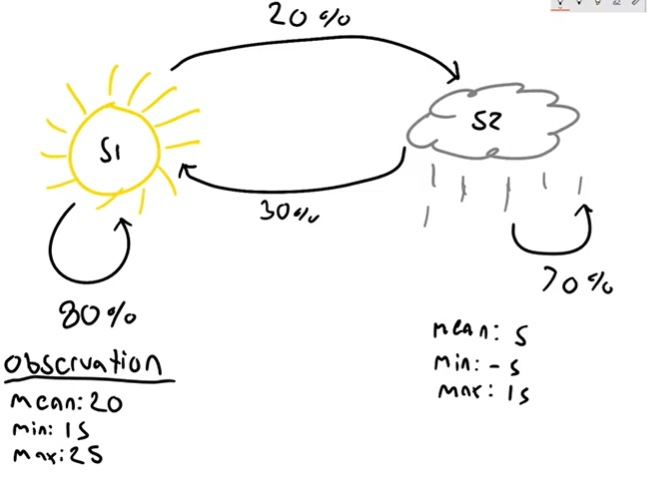

Here we have two states (sunny or rainy) and their transition distributions. Then, we also have our observation distributions. 

For a sunny day, we have a minimum temp of 15 celcius, max of 25, and mean of 20. (We use standard deviation for calculating porbability distribution)

For a rainy day: Min -5, max is 15 and mean is 5. 

We also could use straight porbability observations (40% chance I will wear a jacket if its raining, etc)

##**Building the Model**

In [ ]:
import tensorflow as tf
import tensorflow_probability as tfp # separate from tensorflow model 

https://www.tensorflow.org/probability/api_docs/python/tfp/distributions/HiddenMarkovModel

1. Cold days = 0, Hot days = 1
2. First day has 80% chance of being cold
3. A cold day has a 30% chance of being followed by a hot day
4. Hot day has 20% chance of being followed by a cold day
5. On ea day, temperature is normally distributed with mean and std 0 and 5 on cold days and 15 and 10 for hot days. 

Let's model this in TensorFlow

In [ ]:
tfd = tfp.distributions # shortcut for later (module)
initial_distribution = tfd.Categorical(probs=[0.8, 0.2]) # for our first day
transition_distribution = tfd.Categorical(probs=[[0.7, 0.3],
                                                 [0.2, 0.8]])

observation_distribution = tfd.Normal(loc=[0., 15.], scale=[5., 10.])
# loc represents means, scale is the std's 

In [ ]:
# Building the model

model = tfd.HiddenMarkovModel(
    initial_distribution = initial_distribution,
    transition_distribution = transition_distribution,
    observation_distribution = observation_distribution,
    num_steps = 7 
    # num_steps= 
    # how many days we want to predict, how many times we are running model
    # more steps we take, the less accurate the forecast 
)

In [ ]:
mean = model.mean() # calculate propabilities
# this is a partially defined tensor, we need the value 


with tf.compat.v1.Session() as sess:
  print(mean.numpy())

[2.9999998 5.9999995 7.4999995 8.25      8.625001  8.812501  8.90625  ]


Each number is an estimated temperature for the next days 

Even if we create a new model, we calculate the exact same numbers. No training that goes into the model. 